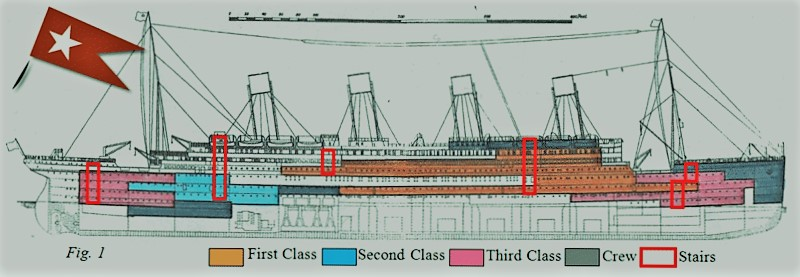

# Load data and import necessary packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [2]:
df = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Data analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [4]:
# delete the columns Name and PassengerId from the dataset
del df['Name']
del df['PassengerId']

In [5]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,male,NaN,2,0,209245,27.14,C12239,S
1,0,3,male,NaN,0,0,27323,13.35,NaN,S
2,0,3,male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,male,25.00,0,0,427635,7.76,NaN,S


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

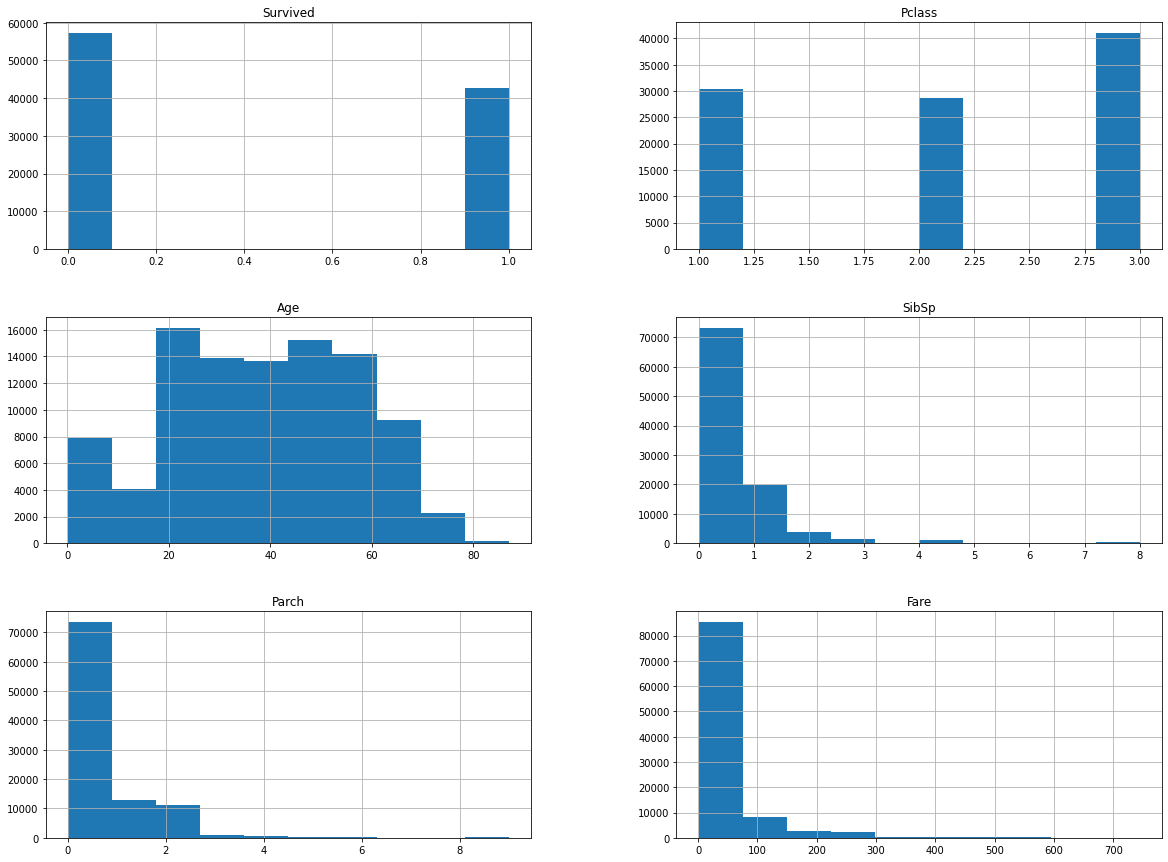

In [6]:
# visualize the features
df.hist(figsize=(20,15))

<AxesSubplot:>

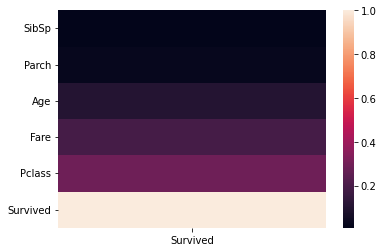

In [7]:

sns.heatmap(df.corr().abs()[['Survived']].sort_values('Survived'))

In [8]:
# determine the values of SibSp
df['SibSp'].unique()

array([2, 0, 1, 3, 4, 8, 5])

In [9]:
df['Cabin'].nunique()

26992

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [11]:
# gather the features with type number in a variable
cat_feat = df[['Sex','Embarked']]

# gather the categorical features

num_feat = df[['Pclass','Age','SibSp','Parch','Fare']]

In [12]:
# normalising
num_feat = (num_feat - num_feat.mean())/num_feat.std()

In [13]:
# one hot encoding the change the categories features to number
pd.get_dummies(cat_feat)

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,0,1,0,0,1
2,0,1,0,0,1
3,0,1,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
99995,1,0,1,0,0
99996,0,1,0,0,1
99997,0,1,0,0,1
99998,0,1,0,0,1


In [14]:
# Concatenate the two types of features, categorical and numerical
data = pd.concat([num_feat, pd.get_dummies(cat_feat)], axis = 1)
data.sample(5)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
19996,1.066087,1.181886,-0.461055,-0.478446,-0.298889,0,1,0,0,1
84130,-1.321325,-0.510850,-0.461055,-0.478446,-0.203328,0,1,1,0,0
62794,-1.321325,-0.347036,1.857609,-0.478446,-0.304206,0,1,0,0,1
30313,-1.321325,0.253611,-0.461055,-0.478446,-0.260090,1,0,0,0,1
18490,-1.321325,-0.183223,-0.461055,1.626649,-0.192694,1,0,1,0,0


In [15]:
import numpy as np
data['Age'] = data['Age'].replace(np.nan, 0)

In [16]:
data['Fare'].unique()

array([-0.24126476, -0.43942878,  0.39317622, ...,  2.90521765,
        2.60933679, -0.57292723])

In [17]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,9.986600e+04,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,6.150636e-16,8.320478e-16,-3.765355e-16,2.309569e-15,6.977770e-16,0.43886,0.56114,0.221870,0.054240,0.721390
std,1.000000e+00,9.834021e-01,1.000000e+00,1.000000e+00,1.000000e+00,0.49625,0.49625,0.415506,0.226492,0.448317
min,-1.321325e+00,-2.090008e+00,-4.610546e-01,-4.784460e-01,-6.214983e-01,0.00000,0.00000,0.000000,0.000000,0.000000
25%,-1.321325e+00,-7.292670e-01,-4.610546e-01,-4.784460e-01,-4.869939e-01,0.00000,0.00000,0.000000,0.000000,0.000000
50%,-1.276191e-01,0.000000e+00,-4.610546e-01,-4.784460e-01,-2.797767e-01,0.00000,1.00000,0.000000,0.000000,1.000000
75%,1.066087e+00,7.996551e-01,6.982770e-01,5.741015e-01,-1.498708e-01,1.00000,1.00000,0.000000,0.000000,1.000000
max,1.066087e+00,2.656203e+00,8.813598e+00,8.994481e+00,1.006959e+01,1.00000,1.00000,1.000000,1.000000,1.000000


In [18]:
target = df['Survived']

# Modeling

In [19]:
# split our dataset
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(data, target , test_size = 0.25)

In [20]:
x_train.shape

(75000, 10)

In [21]:
x_test.shape

(25000, 10)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Pclass      100000 non-null  float64
 1   Age         100000 non-null  float64
 2   SibSp       100000 non-null  float64
 3   Parch       100000 non-null  float64
 4   Fare        99866 non-null   float64
 5   Sex_female  100000 non-null  uint8  
 6   Sex_male    100000 non-null  uint8  
 7   Embarked_C  100000 non-null  uint8  
 8   Embarked_Q  100000 non-null  uint8  
 9   Embarked_S  100000 non-null  uint8  
dtypes: float64(5), uint8(5)
memory usage: 4.3 MB


In [23]:
# using Logistic RegressionCV
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()


In [24]:
x_train = x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
x_test = x_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [25]:
model.fit(x_train, y_train)

LogisticRegressionCV()

In [26]:
model_pred = model.predict(x_test)

In [27]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     14316
           1       0.72      0.75      0.73     10684

    accuracy                           0.77     25000
   macro avg       0.76      0.77      0.76     25000
weighted avg       0.77      0.77      0.77     25000



In [28]:
# using random forest classifier
from sklearn.ensemble import RandomForestClassifier
modelR = RandomForestClassifier()

In [29]:
modelR.fit(x_train, y_train)

RandomForestClassifier()

In [30]:
modelR_predictions = modelR.predict(x_test)

In [31]:
# evaluation
print(classification_report(y_test, modelR_predictions))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76     14316
           1       0.68      0.68      0.68     10684

    accuracy                           0.73     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.73      0.73      0.73     25000

